<a href="https://colab.research.google.com/github/lauraAriasFdez/SentimentAnalysis/blob/main/VisualizeData_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Connect to Google Drive


In [ ]:
# MAIN DIRECTORY STILL TO DO 
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data_file = "/content/gdrive/MyDrive/CSCI4511W/project/sentiments.csv"

In [ ]:
import pandas as pd
import numpy as np

cols = ['sentiment','id','date','query_string','user','text']
sms_data = pd.read_csv(data_file, encoding='latin-1',header=None,names=cols)

# replace lables 0 = neg  1= pos
sms_data.sentiment = sms_data.sentiment.replace({0: 0, 4: 1})

labels = sms_data[sms_data.columns[0]]

### 2. Preprocess Data

In [ ]:
!pip install texthero
import texthero as hero

     |████████████████████████████████| 1.5 MB 7.4 MB/s 
     |████████████████████████████████| 235 kB 54.9 MB/s 
     |████████████████████████████████| 749 kB 50.8 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

custom_cleaning = [
  
  #Replace not assigned values with empty space
  hero.preprocessing.fillna,
  hero.preprocessing.lowercase,
  hero.preprocessing.remove_digits,
  hero.preprocessing.remove_punctuation,
  hero.preprocessing.remove_diacritics,
  hero.preprocessing.remove_stopwords,
  hero.preprocessing.remove_whitespace,
  hero.preprocessing.stem


]

content = hero.clean(sms_data['text'], pipeline = custom_cleaning)

# VISUALIZE

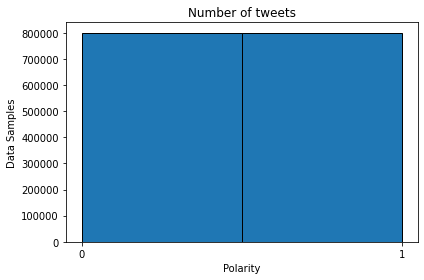

In [ ]:
import matplotlib.pyplot as plt

from pylab import MaxNLocator



plt.hist(sms_data['sentiment'],bins=2,edgecolor='black')
plt.xlabel("Polarity")
plt.title("Number of tweets")
plt.ylabel("Data Samples")

new_list=[0,1]
plt.xticks(new_list)
plt.tight_layout()
plt.show()


#sms_data['sentiment'].hist()


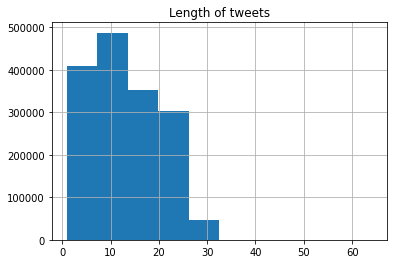

count    1.600000e+06
mean     1.317615e+01
std      6.957978e+00
min      1.000000e+00
25%      7.000000e+00
50%      1.200000e+01
75%      1.900000e+01
max      6.400000e+01
dtype: float64

In [ ]:
# Analyzing Train Tweet Length - https://github.com/skabra5/Sentiment-Analysis-using-Bag-of-Words-TFIDF-Features-and-Recurrent-Neural-Net/blob/master/Sentiment_analysis.ipynb

%matplotlib inline
tweets_len = [len(x.split()) for x in sms_data['text']]
pd.Series(tweets_len).hist()
plt.title("Length of tweets")

plt.show()
pd.Series(tweets_len).describe()

### 3-NGRAM


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

count_vect = CountVectorizer(ngram_range=(2,2))
n_gram_data = count_vect.fit_transform(content)

n_gram_x_train,n_gram_x_test,y_train,y_test = train_test_split(n_gram_data,labels,test_size = 0.3, stratify=labels,random_state=100)

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score

print("NAIVE BAYES + 2-GRAM______________________________________________________________")
clf_multinomialnb = MultinomialNB()
clf_multinomialnb.fit(n_gram_x_train,y_train)

y_pred = clf_multinomialnb.predict(n_gram_x_test)
print(classification_report(y_test,y_pred))

f1_score(y_test,y_pred)

NAIVE BAYES + 2-GRAM______________________________________________________________
              precision    recall  f1-score   support

           0       0.70      0.80      0.74    240000
           1       0.76      0.65      0.70    240000

    accuracy                           0.73    480000
   macro avg       0.73      0.73      0.72    480000
weighted avg       0.73      0.73      0.72    480000



0.7042278805395423

### Linear SVM

In [ ]:
from sklearn.svm import LinearSVC

# SVM + TLF 
print("LINEAR SVM + 2 GRAM______________________________________________________________")
linearsvc = LinearSVC()
linearsvc.fit(n_gram_x_train,y_train)

y_pred = linearsvc.predict(n_gram_x_test)

print(classification_report(y_test,y_pred))
f1_score(y_test,y_pred)

LINEAR SVM + 2 GRAM______________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


              precision    recall  f1-score   support

           0       0.73      0.67      0.70    240000
           1       0.70      0.76      0.73    240000

    accuracy                           0.71    480000
   macro avg       0.72      0.71      0.71    480000
weighted avg       0.72      0.71      0.71    480000



0.7261425141008543

### Logistic Regression 

In [ ]:

from sklearn.linear_model import LogisticRegression

print("LOGISTIC REGRESSION + 2 GRAMS______________________________________________________________")

logisticRegr = LogisticRegression()
logisticRegr.fit(n_gram_x_train,y_train)

y_pred = logisticRegr.predict(n_gram_x_test)

print(classification_report(y_test,y_pred))
f1_score(y_test,y_pred)

LOGISTIC REGRESSION + 2 GRAMS______________________________________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.76      0.66      0.71    240000
           1       0.70      0.79      0.74    240000

    accuracy                           0.73    480000
   macro avg       0.73      0.73      0.72    480000
weighted avg       0.73      0.73      0.72    480000



0.7407196381768958